1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos
correspondientes.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB
None
        Unnamed: 0  Birth.Weight  Gestational.Days  Maternal.Age   
count  1174.000000   1174.000000       1174.000000   1174.000000  \
mean    587.500000    119.462521        279.101363     27.228279   
std     339.048915     18.328671         16.010305      5.817839   
min       1.000000     55.000000        148.000000     15.000000   
25%     294.250

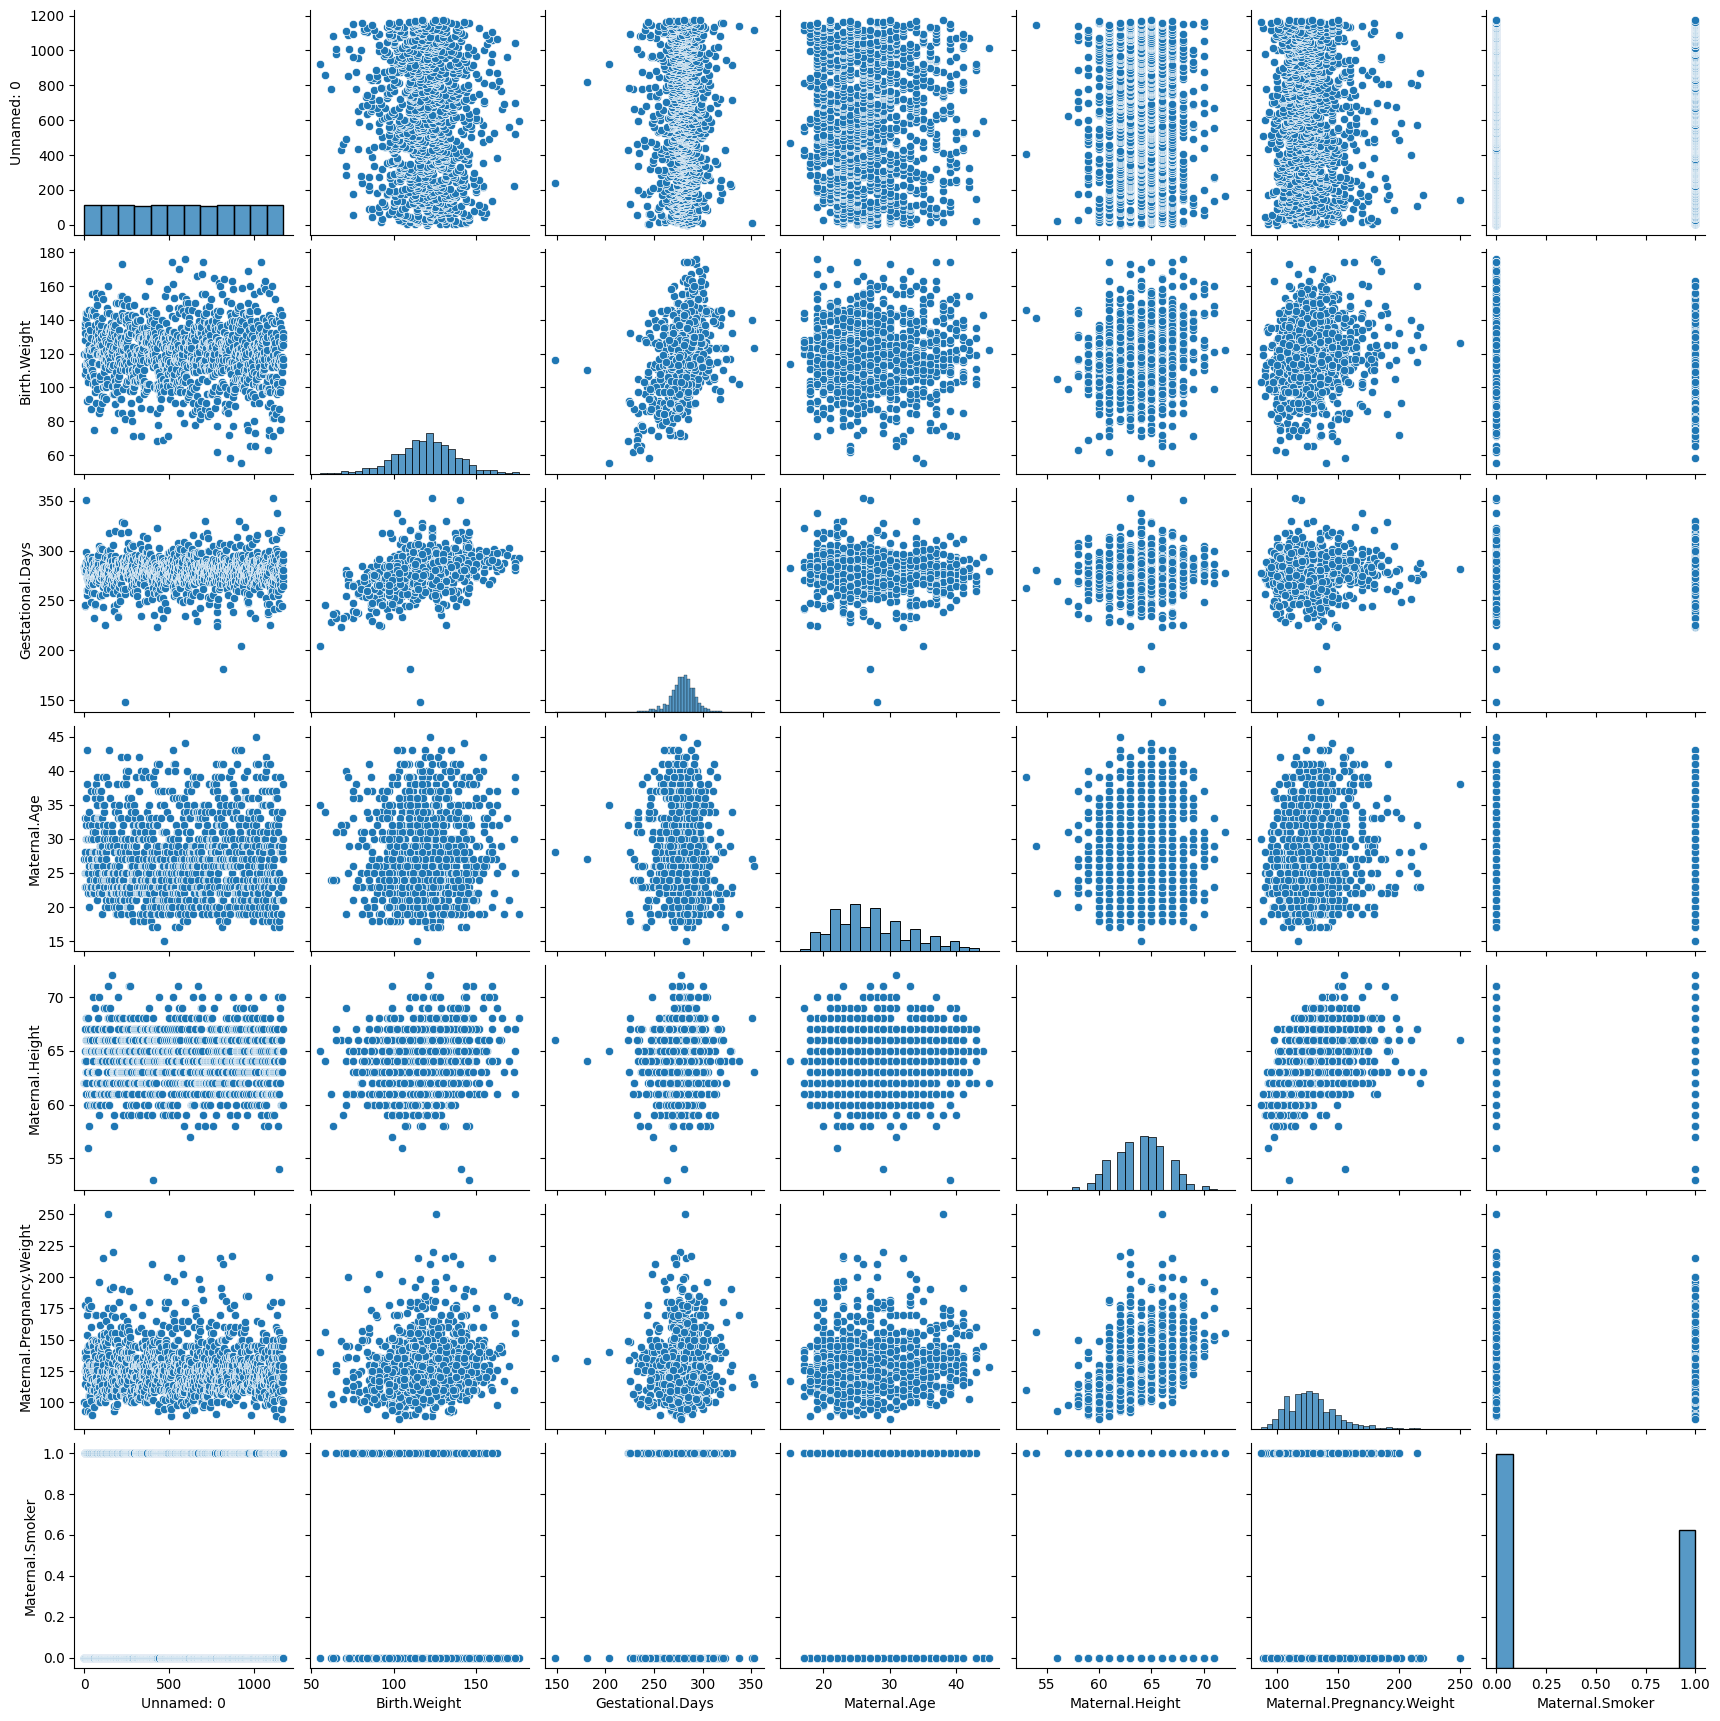

'Explorando un poco los datos con las graficas de distribucion podemos observar que son pocos los casos que \nno siguen la distribucion general se salen de los parametros vistos que generan los datos'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt #FernandoSanchez
import seaborn as sb
import statsmodels.api as sm
from scipy.stats import ttest_ind,norm,binom

data = pd.read_csv('baby.csv') #FernandoSanchez

#FernandoSanchez Información y estadísticas descriptivas 
print(data.info())
print(data.describe())

#FernandoSanchez Gráficos de distribución y diagramas de dispersión
sb.pairplot(data)
plt.show()
"""Explorando un poco los datos con las graficas de distribucion podemos observar que son pocos los casos que 
no siguen la distribucion general se salen de los parametros vistos que generan los datos"""

2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución
normal? Justifica tu respuesta creando los gráficos y modelos necesarios.


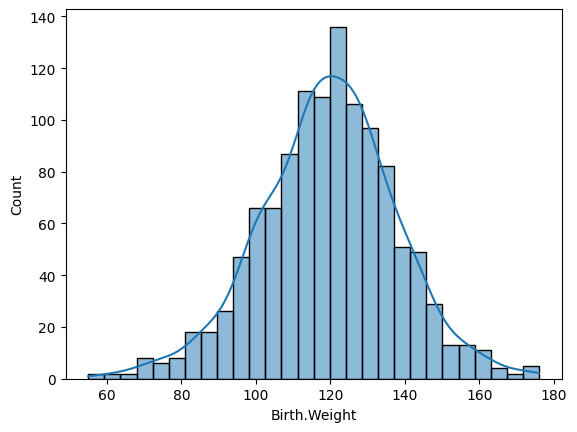

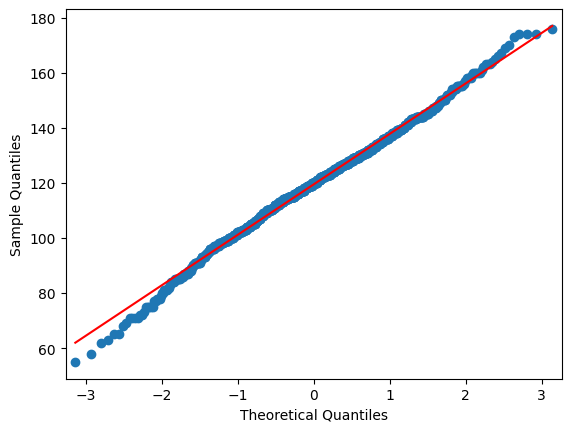

In [4]:
#FernandoSanchez Histograma y gráfico para el peso de los bebés
sb.histplot(data['Birth.Weight'], kde=True)
plt.show()

sm.qqplot(data['Birth.Weight'], line='s')
plt.show()

"""Observando el histograma nos damos cuenta que muchos de los bebes nacieron con un peso de 120 y pocos con pesos de 60 o menor y mayor a 160.
Por ultimo en la grafica nos damos cuenta que la distribucion esta casi alineada a nuestra linea media."""

3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para
5 valores diferentes. Compara con los datos reales.


<Figure size 800x400 with 0 Axes>

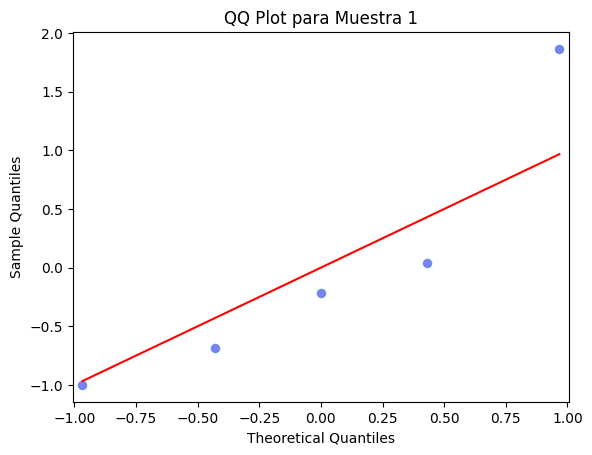

<Figure size 800x400 with 0 Axes>

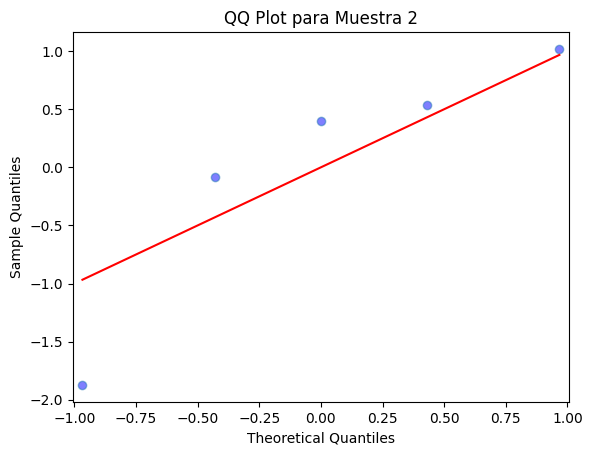

<Figure size 800x400 with 0 Axes>

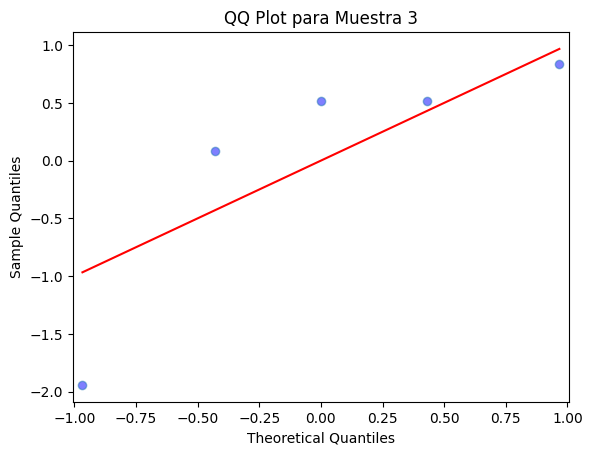

<Figure size 800x400 with 0 Axes>

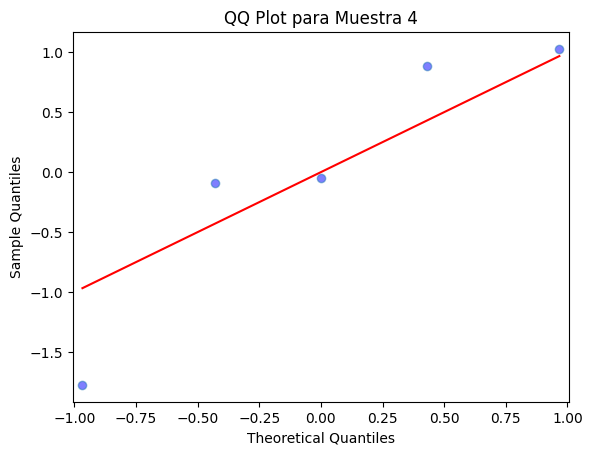

<Figure size 800x400 with 0 Axes>

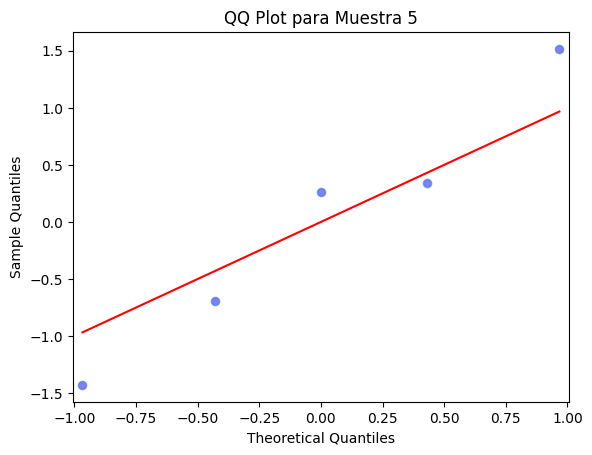

In [4]:

#FernandoSanchez Selecciona aleatoriamente 5 conjuntos de datos
random_samples = [data['Birth.Weight'].sample(n=5) for _ in range(5)]

#FernandoSanchez Gráficos para verificar la normalidad
for i, sample in enumerate(random_samples):
    plt.figure(figsize=(8, 4))
    
    #FernandoSanchez Gráfico de probabilidad normal
    sm.qqplot(sample, line='s', fit=True, markerfacecolor='blue', alpha=0.5)
    
    plt.title(f'QQ Plot para Muestra {i+1}')
    plt.show()
"""Al crear un for para escoger aleatoriamente 5 valores para poder verificar el modelo, nos damos cuenta que los conjuntos de datos muestran desviaciones significativas de la normalidad ya
que al ser aleatorios podemos ver datos que en el modelo con todos los datos igualmente se desvian de lo normal, al igual podemos encontrar graficas que no tienen tanta desviación de la normalidad."""


4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué
diferencias existen? Explica y construye los modelos correspondientes.


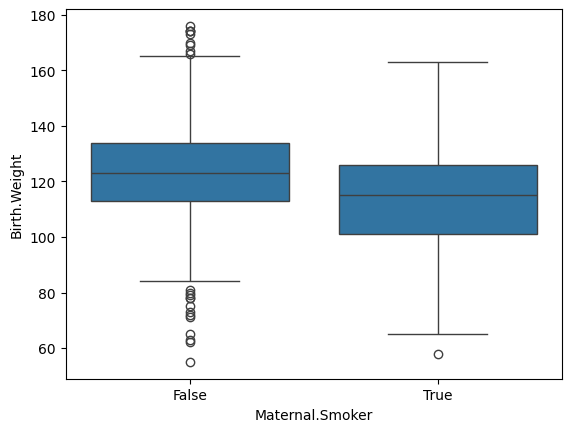

TtestResult(statistic=-8.718755502379533, pvalue=9.461067881089321e-18, df=1172.0)


In [5]:
#FernandoSanchez Gráfico de caja para comparar pesos de bebés de madres fumadoras y no fumadoras
sb.boxplot(x='Maternal.Smoker', y='Birth.Weight', data=data)
plt.show()

#FernandoSanchez Prueba t de Student
result = ttest_ind(data[data['Maternal.Smoker']]['Birth.Weight'],
                   data[~data['Maternal.Smoker']]['Birth.Weight'])
print(result)

"""Observando el grafico de cajas podemos ver que los datos que más varian son de las 
madres que no fuman pero sin embargo la linea del segundo quintil esta mas alta en los bebes de las madres que no fuman y esta linea es casi el primer quintil de las madres fumadoras"""


5. Considerando los datos dados:
● Calcula la probabilidad de que una madre escogida al azar fume.
● A partir del valor anterior, construye un modelo de distribución binomial que
modele el experimento correspondiente a escoger 5 madres al azar y observar
cuántas fuman.
● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias
muestrales.
● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula
sus respectivas medias muestrales.
Utilizando lo anterior:
● compara gráficamente los resultados obtenidos anteriormente.
● verifica el teorema del límite central, considerando las muestras de datos reales y
las simuladas con el modelo binomial.
● construye un modelo de distribución normal derivado del modelo binomial, y
grafícalo junto a los anteriores para comparar. Concluye.

Probabilidad de que una madre fume: 0.3909710391822828


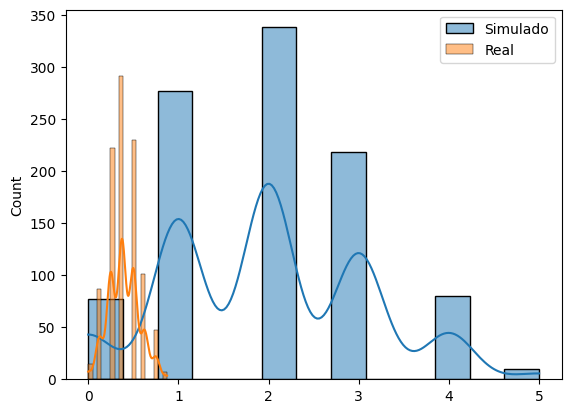

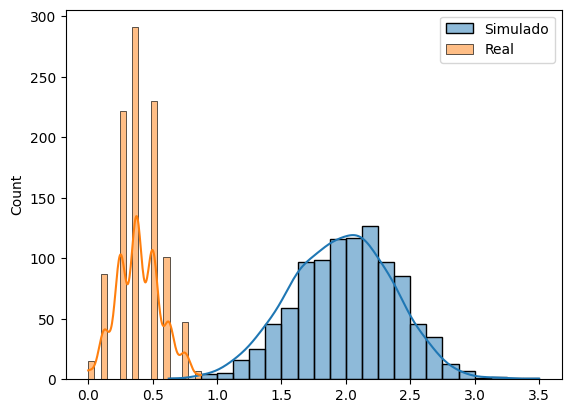

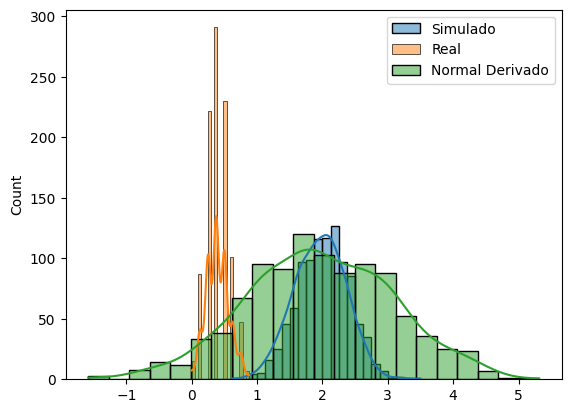

In [8]:
#FernandoSanchez Probabilidad de que una madre fume
prob_fumar = data['Maternal.Smoker'].mean()
print(f"Probabilidad de que una madre fume: {prob_fumar}")

#FernandoSanchez Modelo binomial
n = 5
p = prob_fumar
binomial_model = binom(n, p)

#FernandoSanchez Simulaciones
simulated_data = binomial_model.rvs(size=1000)
sample_means_simulated = [binomial_model.rvs(size=8).mean() for _ in range(1000)]
sample_means_real = [data['Maternal.Smoker'].sample(n=8).mean() for _ in range(1000)]

#FernandoSanchez Comparación gráfica
sb.histplot(simulated_data, kde=True, label='Simulado')
sb.histplot(sample_means_real, kde=True, label='Real')
plt.legend()
plt.show()

#FernandoSanchez Teorema del límite central
sb.histplot(sample_means_simulated, kde=True, label='Simulado')
sb.histplot(sample_means_real, kde=True, label='Real')
plt.legend()
plt.show()

#FernandoSanchez Modelo de distribución normal derivado del modelo binomial
mean_binomial = n * p
std_binomial = (n * p * (1 - p)) ** 0.5
normal_model = norm(loc=mean_binomial, scale=std_binomial)

#FernandoSanchez Comparación con datos reales y simulados
sb.histplot(sample_means_simulated, kde=True, label='Simulado')
sb.histplot(sample_means_real, kde=True, label='Real')
sb.histplot(normal_model.rvs(size=1000), kde=True, label='Normal Derivado')
plt.legend()
plt.show()

"""Observamos que la probabilidad de que una madre fume es del 39%.
Notamos que en las graficas los datos simulados son más alejados y totalmente diferentes a los reales ya que los datos reales estan entre el 0 y el 1 en todos los casos
pero tampoco se apegan a los datos normales derivados"""